# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets.<br/>
You will be graded based on a combination of your code producing the expected results,<br/>
your written responses to the questions and a passing leaderboard score in the final exercise.

## Libraries used

In [1]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy import ndimage as ndi

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them.<br/>
You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [2]:
# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
# Returns an Bunch data-structure:
#  - target: classification target [ndarray of shape (1797,)]
#  - images: raw image data [ndarray of shape (1797, 8, 8)]

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

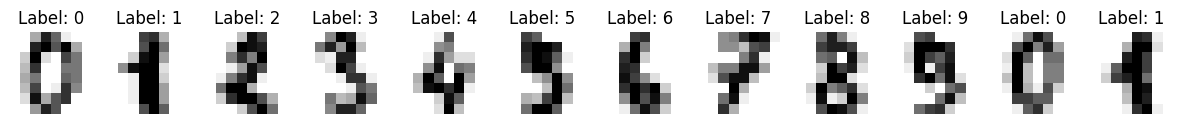

In [3]:
# Create a single row with 12 subplots of equal size
_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
# zip() takes iterables (sets), combine them in a tuple, and returns it.
# we plot each of the digits in the subplots
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets,<br/>
with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.<br/>
Check out the documentation to figure out how to set the parameters to get the desired split. 

In [4]:
# Split dataset in 80:10:10 for train:vali:test dataset
train_size = 0.8
vali_test_size = 0.5 # split the remaining set 50/50. Meaning 10% each of the remaining set.

# Split dataset into train and remaining set
X_train, X_rem, y_train, y_rem = train_test_split(digits.data, digits.target, train_size=train_size, random_state=0)

# Split remaining set into vali and test set
X_vali, X_test, y_vali, y_test = train_test_split(X_rem, y_rem, test_size=vali_test_size, random_state=0)

<ins>Comment</ins>:

We use the train_test_split function twice, first to split the data into a training set and a remaining set,<br/>
with a training size of 0.8 (=80%), and then to split the remaining set into a validation- and a test set,<br/>
with a test size of 0.5 (meaning 10% each). We use the random_state parameter with a value of 0 to ensure reproducibility of the split.<br/>
Finally, we print the sizes of the resulting train, validation, and test sets.

Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already.<br/>
We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [5]:
# Print number of images in each set
print("Number of images:")
print(f" - Total: {len(y)}")
print(f" - Training: {y_train.shape[0]}")
print(f" - Validation: {y_vali.shape[0]}")
print(f" - Test: {y_test.shape[0]}\n")

# Count frequency of each class in training set
class_counts = np.unique(y_train, return_counts=True)
for label, count in zip(class_counts[0], class_counts[1]):
    percentage = count/y_train.shape[0] * 100
    print(f"Class {label}: {count} images ({percentage:.2f}% of all)")

# Check if the classes in training set are balanced
tolerance_percentage = 5 
min_percentage = np.min(class_counts[1]) / y_train.shape[0] * 100
max_percentage = np.max(class_counts[1]) / y_train.shape[0] * 100
if abs(max_percentage - min_percentage) <= tolerance_percentage:
    print(f"""\nThe classes in the training set are balanced.\n
          The difference between min. and max. percentage is {abs(min_percentage-max_percentage):.2f}%.""")
else:
    print(f"""\nThe classes in the training set are NOT balanced.\n
          The difference between min. and max. percentage is {abs(min_percentage-max_percentage):.2f}%.""")

Number of images:
 - Total: 1797
 - Training: 1437
 - Validation: 180
 - Test: 180

Class 0: 151 images (10.51% of all)
Class 1: 147 images (10.23% of all)
Class 2: 141 images (9.81% of all)
Class 3: 154 images (10.72% of all)
Class 4: 151 images (10.51% of all)
Class 5: 142 images (9.88% of all)
Class 6: 137 images (9.53% of all)
Class 7: 140 images (9.74% of all)
Class 8: 135 images (9.39% of all)
Class 9: 139 images (9.67% of all)

The classes in the training set are balanced.

          The difference between min. and max. percentage is 1.32%.


<ins>Comment</ins>:
- The number of images can be seen above.
- The classes are almost balanced.

### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression.<br/>
We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it.<br/>
We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.<br/>
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

LinearRegression MSE:  3.004985641346828
LinearRegression accuracy:  0.22777777777777777


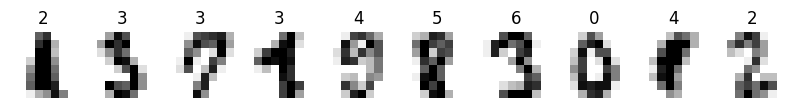

In [6]:
# Define model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Normally tuning hyperparameters will be done here of the validation set.
# But the `LinearRegression` doesn't have hyperparameters to tune.

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Accuracy
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, np.round(y_pred))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again,<br/>
check out the documentation to see how to use it. Fit the model and make predictions on the test set. 

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image),<br/>
but for a different model this time.

LogisticRegression MSE:  1.1388888888888888
LogisticRegression accuracy:  0.9611111111111111


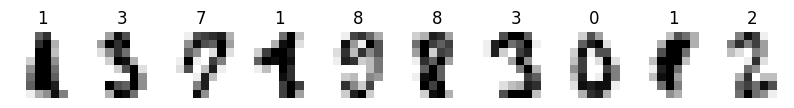

In [7]:
# Define model
model = LogisticRegression(random_state=0, max_iter=5000) # set random_state=0, to get same results.

# Fit model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Normally tuning hyperparameters will be done here of the validation set.
# But the `LinearRegression` doesn't have hyperparameters to tune.

# Calculate Mean Squared Error (MSE) and Accuracy
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, np.round(y_pred))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LogisticRegression MSE: ", mse)
print("LogisticRegression accuracy: ", acc)

# Plot some test images with their predicted labels:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### Written Questions

1a) Describe the trends you observe in the results. Is there anything interesting or unexpected? 

1b) How do the results compare to the linear regression model? 

1c) What do you think is the reason for this?

#### Answers:

1a) The results show that the LogisticRegression model has significantly better performance than the LinearRegression model.<br/>
The MSE (mean squared error) for the LogisticRegression model is much lower than that of the LinearRegression model (1.14 vs. 3.00),<br/>
and the accuracy of the LogisticRegression model is much higher (96.1% vs. 22.7%) than that of the LinearRegression model.<br/>
NOTE: Max. iterations was needed to be set to >3000, otherwise it was stopping processing the images.

1b) The results show that the LogisticRegression model outperforms the LinearRegression model in terms of both MSE and accuracy.

1c) The reason for the better performance of the LogisticRegression model is that it is specifically designed<br/>
for binary classification tasks, while LinearRegression is not. LogisticRegression models the probability of<br/>
the outcome variable being in one of the two possible classes based on the input variables, while LinearRegression models<br/>
the relationship between the input variables and the continuous outcome variable.<br/>
In other words, the logistic regression model is better suited to the binary classification task at hand.

#### Answers:

1a) The results show that the LogisticRegression model has significantly better performance than the LinearRegression model.<br/>
The MSE (mean squared error) for the LogisticRegression model is much lower than that of the LinearRegression model (1.14 vs. 3.00),<br/>
and the accuracy of the LogisticRegression model is much higher (96.1% vs. 22.7%) than that of the LinearRegression model.<br/>
NOTE: Max. iterations was needed to be set to >3000, otherwise it was stopping processing the images.

1b) The results show that the LogisticRegression model outperforms the LinearRegression model in terms of both MSE and accuracy.

1c) The reason for the better performance of the LogisticRegression model is that it is specifically designed<br/>
for binary classification tasks, while LinearRegression is not. LogisticRegression models the probability of<br/>
the outcome variable being in one of the two possible classes based on the input variables, while LinearRegression models<br/>
the relationship between the input variables and the continuous outcome variable.<br/>
In other words, the logistic regression model is better suited to the binary classification task at hand.

## Exercise 3.2: Counting stars

Your team is tasked with applying data science and machine learning techniques to some recently collected telescope image data.<br/>
The telescope takes low resolution images, in which stars either appear as squares or circles.<br/>
Your task is to train a classifier to determine whether there are more circular stars than square stars in each image.<br/>
The budget is tight this year so there are no resources available to train expensive deep neural networks;<br/>
you will need to train a linear or logistic regression classifier instead.

You are encouraged to be creative, and to try out different things empirically, too.<br/>
Preprocessing could be crucial to the success of your model. Good luck!

Below is a sample of the data you'll be working with. Above each image is the label, which shows the number of circular and square stars, respectively.<br/>
We do not count the small noisy background stars. 

![](sample.png)

### D: Programming Exercise

1. Create an account on Kaggle to collect the data https://www.kaggle.com/competitions/ds2023-counting-stars/.<br/>Use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the training data from https://www.kaggle.com/competitions/ds2023-counting-stars/data.<br/>Check out the Dataset Description for more information about the data and your task.
3. Load the training data file `stars_train_X_y.npz` and split it into `train`, `val`, and `test` splits.
4. Use a linear or logistic regression model to fit the `train` data. Use the `val` and `test` splits<br/>for model selection and hyperparameter optimization. (You should measure performance using accuracy).

stars_train_X_y.npz - labeled set of data, consisting of previously received and hand-labeled photos from Voyager 1.

stars_test_X.npz - unlabeled set of images, it's your job to tell us, for each image, whether there are more circular stars than square stars or not.

#### Kaggle Username: HenrikDC

#### Helper functions

In [8]:
class Shape(Enum):
    Squares = 1
    Circles = 2

In [9]:
def transform_to_1d(x):
    return x.reshape((4096,))

In [10]:
def transform_to_2d(x):
    return x.reshape((64,64))

In [11]:
def show_img(x, y):
    x1 = np.copy(x)
    y1 = np.copy(y)
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs[0, 0].imshow(transform_to_2d(x1), cmap='gray')
    axs[0, 0].set_title("Original Image")
    axs[0, 1].imshow(transform_to_2d(np.add(get_shape(x1, Shape.Circles), get_shape(x1, Shape.Squares))), cmap='gray')
    axs[0, 1].set_title("Circles and Squares")
    axs[1, 0].imshow(transform_to_2d(get_shape(x1, Shape.Circles)), cmap='gray')
    axs[1, 0].set_title("Circles only")
    axs[1, 1].imshow(transform_to_2d(get_shape(x1, Shape.Squares)), cmap='gray')
    axs[1, 1].set_title("Squares only")
    plt.suptitle(f"circles: {int(y[0])}, squares: {int(y[1])}")
    plt.show()

In [12]:
def remove_values(x, shape: Shape):
    if shape == Shape.Circles:
        x[x == Shape.Squares.value] = 0
    elif shape == Shape.Squares:
        x[x == Shape.Circles.value] = 0
    return x

In [13]:
def remove_small_features(w):
    # Label features
    labeled, num_features = ndi.label(w)
    # Loop over all features
    for i in range(1, num_features+1):
        mask = labeled == i
        size = np.sum(mask)
        # Remove small features
        if size < 4:
            w[mask] = 0
    return w

In [14]:
def get_shape(x, shape:Shape):
    w = np.copy(x)
    w = transform_to_2d(w)
    w = remove_values(w, shape)
    w = remove_small_features(w)
    w = transform_to_1d(w)
    return w

#### Load data

In [15]:
data = np.load('data/stars_train_X_y.npz')
X = data['X_train']
y = data['y_train']

#### Idea
Make two regression models one for circles and one for squares and compare the number of found afterwards.

##### Showcase of idea

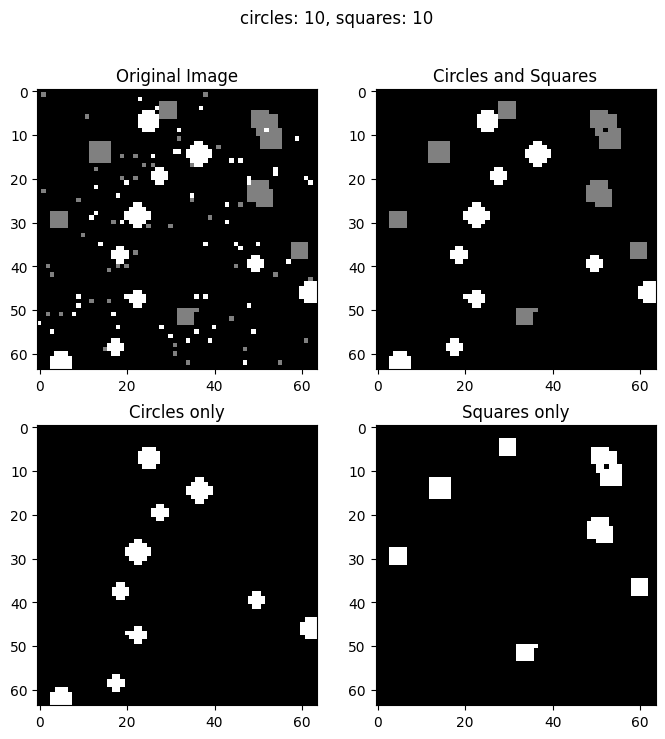

In [16]:
idx = 42
show_img(X[idx], y[idx])

<ins>Comment</ins>:

As can be seen above we are able to remove the noise and splitting circles and squares into separate images (datasets).

#### Split data

In [17]:
# Split dataset in 80:10:10 for train:vali:test dataset
train_size = 0.8
vali_test_size = 0.5 # split the remaining set 50/50. Meaning 10% each of the remaining set.

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=0)
X_vali, X_test, y_vali, y_test = train_test_split(X_rem, y_rem, test_size=vali_test_size, random_state=0)

# Make copies of the datasets for both models
X_c_train = np.copy(X_train)
y_c_train = np.copy(y_train[:,0])

X_s_train = np.copy(X_train)
y_s_train = np.copy(y_train[:,1])

X_c_vali = np.copy(X_vali)
y_c_vali = np.copy(y_vali[:,0])
X_s_vali = np.copy(X_vali)
y_s_vali = np.copy(y_vali[:,1])

X_c_test = np.copy(X_test)
y_c_test = np.copy(y_test[:,0])
X_s_test = np.copy(X_test)
y_s_test = np.copy(y_test[:,1])

# Get two separated images with circles in the one and squares in the other
for i in range(len(X_train)):
    X_c_train[i] = get_shape(X_c_train[i], Shape.Circles)
    X_s_train[i] = get_shape(X_s_train[i], Shape.Squares)
for i in range(len(X_vali)):
    X_c_vali[i] = get_shape(X_c_vali[i], Shape.Circles)
    X_s_vali[i] = get_shape(X_s_vali[i], Shape.Squares)
for i in range(len(X_test)):
    X_c_test[i] = get_shape(X_c_test[i], Shape.Circles)
    X_s_test[i] = get_shape(X_s_test[i], Shape.Squares)

# True values
y_c_test_true = y_test[:,0].astype(int)
y_s_test_true = y_test[:,1].astype(int)
y_test_true = y_c_test_true > y_s_test_true

#### Linear regression model

In [23]:
# Define model, fit and make predictions for Circles
model_c = LinearRegression(n_jobs=-1) # n_jobs=-1: run on all processors
model_c.fit(X_c_train, y_c_train)
y_c_test_pred = model_c.predict(X_c_test)

# Define model, fit and make predictions for Squares
model_s = LinearRegression(n_jobs=-1) # n_jobs=-1: run on all processors
model_s.fit(X_s_train, y_s_train)
y_s_test_pred = model_s.predict(X_s_test)

# Compare the predictions and create a new boolean array where True means "more circles than squares"
y_test_pred = np.where(y_c_test_pred > y_s_test_pred, 1, 0)

# Make predictions for true values as floats,
# otherwise comparing cannot be done with predictions which are given as floats
y_c_test_true = y_c_test_true.astype(float)
y_s_test_true = y_s_test_true.astype(float)

# Calculate MSE and accuracy
mse_c = mean_squared_error(y_c_test_true, y_c_test_pred)
mse_s = mean_squared_error(y_s_test_true, y_s_test_pred)
mse_t = mean_squared_error(y_test_true, y_test_pred)
acc_t = accuracy_score(y_test_true, y_test_pred)

# Accuracy doesn't tell much for individual cases, since exactly matches are not necessary needed
print(f"LinearRegression: Circles, MSE: {mse_c}")
print(f"LinearRegression: Squares, MSE: {mse_s}")
print(f"LinearRegression: Total, MSE: {mse_t}, accuracy: {acc_t}")

LinearRegression: Circles, MSE: 1.2829718889535326
LinearRegression: Squares, MSE: 1.7983998080700547
LinearRegression: Total, MSE: 0.065, accuracy: 0.935


#### Logistic regression model

In [19]:
# Define model, fit and make predictions for Circles
model_c = LogisticRegression(random_state=0, max_iter=5000, n_jobs=-1)
# set random_state=0, to get same results; n_jobs=-1: run on all processors
model_c.fit(X_c_train, y_c_train)
y_c_test_pred = model_c.predict(X_c_test)

# Define model, fit and make predictions for Squares
model_s = LogisticRegression(random_state=0, max_iter=5000, n_jobs=-1)
# set random_state=0, to get same results; n_jobs=-1: run on all processors
model_s.fit(X_s_train, y_s_train)
y_s_test_pred = model_s.predict(X_s_test)

# Compare the predictions and create a new boolean array where True means "more circles than squares"
y_test_pred = np.where(y_c_test_pred > y_s_test_pred, 1, 0)

# Make predictions for true values as floats,
# otherwise comparing cannot be done with predictions which are given as floats
y_c_test_true = y_c_test_true.astype(float)
y_s_test_true = y_s_test_true.astype(float)

# Calculate MSE and accuracy
mse_c = mean_squared_error(y_c_test_true, y_c_test_pred)
mse_s = mean_squared_error(y_s_test_true, y_s_test_pred)
mse_t = mean_squared_error(y_test_true, y_test_pred)
acc_t = accuracy_score(y_test_true, y_test_pred)

# Accuracy doesn't tell much for individual cases, since exactly matches are not necessary needed
print(f"LogisticRegression: Circles, MSE: {mse_c}") 
print(f"LogisticRegression: Squares, MSE: {mse_s}")
print(f"LogisticRegression: Total, MSE: {mse_t}, accuracy: {acc_t}")

LogisticRegression: Circles, MSE: 1.94625
LogisticRegression: Squares, MSE: 2.10625
LogisticRegression: Total, MSE: 0.09375, accuracy: 0.90625


<ins>Comment</ins>:

As can be seen with no optimization the Linear model is better and faster to compute than the Logistic regression model.

Note that comparisons are made by MSE, since accuracy doesn't tell so much since close values can be okay.

We will now try to optimize the Logistic regression model to see if it can be better.

##### Optimization of (hyper)parameters for the Logistic regression model
Some issues during optimization:
- Running out of memory with cv>2.
- Using training set takes way too long - validation set is used.

In [22]:
# Define the parameter grid to search over
param_grid = {
    #C:
    # High value: Tells the model to give high weight to the training data, and a lower weight to the complexity penalty.
    # Low value: Give more weight to this complexity penalty at the expense of fitting to the training data.
    # Basically, a high C means "Trust this training data a lot", while a low value says
    # "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".
    #'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    # solvers not tested due to:
    # liblinear: for small datasets;
    # sag: "version 2" is used instad, 'saga'
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'saga'] 
}

# Define model, set random state for reproducibility
model_c = LogisticRegression(random_state=0, max_iter=5000, n_jobs=-1)

# Create Grid Search object
grid_search_c = GridSearchCV(model_c, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
# cv=3: 3-fold cross validation, n_jobs=-1: run on all processors

# Fit the Grid Search object to the data
grid_result = grid_search_c.fit(X_c_vali, y_c_vali)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

# Get the best parameters and the best score
print("Best parameters for Circles: ", grid_search_c.best_params_)
print("Best score for Circles: ", grid_search_c.best_score_)

# Use the best parameters to train the model and make predictions
model_c = grid_search_c.best_estimator_
y_c_test_pred = model_c.predict(X_c_test)

# Define model, set random state for reproducibility
model_s = LogisticRegression(random_state=0, max_iter=5000, n_jobs=-1)

# Create Grid Search object
grid_search_s = GridSearchCV(model_s, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
# cv=3: 3-fold cross validation
# n_jobs=-1: run on all processors
# verbose=10: showing progress

# Fit the Grid Search object to the data
grid_result = grid_search_s.fit(X_s_vali, y_s_vali)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

# Get the best parameters and the best score
print("Best parameters for Squares: ", grid_search_s.best_params_)
print("Best score for Squares: ", grid_search_s.best_score_)

# Use the best parameters to train the model and make predictions
model_s = grid_search_s.best_estimator_
y_s_test_pred = model_s.predict(X_s_test)

# Compare the predictions and create a new boolean array where True means "more circles than squares"
y_test_pred = np.where(y_c_test_pred > y_s_test_pred, 1, 0)

# Make predictions for true values as floats,
# otherwise comparing cannot be done with predictions which are given as floats
y_c_test_true = y_c_test_true.astype(float)
y_s_test_true = y_s_test_true.astype(float)

# Calculate MSE and accuracy
mse_c = mean_squared_error(y_c_test_true, y_c_test_pred)
mse_s = mean_squared_error(y_s_test_true, y_s_test_pred)
mse_t = mean_squared_error(y_test_true, y_test_pred)
acc_t = accuracy_score(y_test_true, y_test_pred)

# Accuracy doesn't tell much for individual cases, since exactly matches are not necessary needed
print(f"LogisticRegression: Circles, MSE: {mse_c}") 
print(f"LogisticRegression: Squares, MSE: {mse_s}")
print(f"LogisticRegression: Total, MSE: {mse_t}, accuracy: {acc_t}")

Fitting 2 folds for each of 12 candidates, totalling 24 fits
-6.67 (0.17999999999999972) with: {'C': 0.1, 'solver': 'lbfgs'}
-6.67 (0.17999999999999972) with: {'C': 0.1, 'solver': 'newton-cg'}
-6.7787500000000005 (0.011249999999999982) with: {'C': 0.1, 'solver': 'newton-cholesky'}
-7.157500000000001 (0.00749999999999984) with: {'C': 0.1, 'solver': 'saga'}
-7.268750000000001 (0.16374999999999984) with: {'C': 1, 'solver': 'lbfgs'}
-7.268750000000001 (0.16374999999999984) with: {'C': 1, 'solver': 'newton-cg'}
-7.65625 (0.25875000000000004) with: {'C': 1, 'solver': 'newton-cholesky'}
-8.585 (0.012500000000000178) with: {'C': 1, 'solver': 'saga'}
-7.53 (0.05750000000000011) with: {'C': 10, 'solver': 'lbfgs'}
-7.53 (0.05750000000000011) with: {'C': 10, 'solver': 'newton-cg'}
-8.25875 (0.2262499999999994) with: {'C': 10, 'solver': 'newton-cholesky'}
-14.13875 (0.7162500000000005) with: {'C': 10, 'solver': 'saga'}
Best parameters for Circles:  {'C': 0.1, 'solver': 'lbfgs'}
Best score for Circl

<ins>Comment</ins>:

No improvement sees to be made with optimation of hyperparameters.

We stick to the Linear Regression model.

### E: Unlabelled data evaluation

You should download the unlabeled test data from https://www.kaggle.com/competitions/ds2023-counting-stars/data <br/>
and make predictions for all of the unlabeled images in the test set.<br/>
You can submit your best predictions to Kaggle three times/day.

The course responsible has submitted a naive baseline and we're sure you can beat that score!<br/>
This programming exercise is considered passed if you achieve  $\text{Score} \ge 0.90$ on the leaderboard.

In [21]:
# Load the test data
test_data = np.load('data/stars_test_X.npz')
X_test_unlabeled = test_data['X_test']

X_c = np.copy(X_test_unlabeled)
X_s = np.copy(X_test_unlabeled)

for i in range(len(X_test_unlabeled)):
    X_c[i] = get_shape(X_c[i], Shape.Circles)
    X_s[i] = get_shape(X_s[i], Shape.Squares)

# Make predictions    
y_c_pred = model_c.predict(X_c)
y_s_pred = model_s.predict(X_s)

# Compare predictions - create boolean array
#   True: More circles than squares
#   False: More squares than circles
y_pred = y_c_pred > y_s_pred

output_file = "prediction.csv"

# DO NOT INSERT OR CHANGE ANYTHING BELOW
import numpy as np
# Use this function to save your predictions on stars_test_X.npz to a "prediction.csv" file.
# The produced csv file can be directly uploaded to Kaggle for evaluation.
def y_pred_to_kaggle_format (y_pred : np.ndarray) -> None:
    np.c_[np.arange(1, len(y_pred)+1), y_pred]
    np.savetxt(output_file, np.c_[np.arange(1, len(y_pred)+1), y_pred], fmt='%i', delimiter=",", header="Id,Category", comments='')

y_pred_to_kaggle_format(y_pred)

# NOW YOU CAN UPLOAD THE prediction.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

2b) Which techniques were not useful in improving performance on this task?

#### Answers:

2a) Explanation of the techniques:
The most important thing in the exercise was to remove noise in the image. We did this by removing all features smaller than 4 pixels, as you cannot distinguish between than square otherwise.<br/>
After that we split the data set as usual into training, validation and test set. These tree sets were then further split into two by sorting squares away from one and circles away from the other. That way, we only have squares in one and only circles in the other. This was done simply by sorting by color, as circles have pixel values of 2 and squares of 1.<br/>
Now we made two models one for counting circles and one for counting squares. And the output (predictions) from the two could then be compared - "are there more circles than squares".

2b) The following was not a success:
- Just do the model on the image as is (naive solution)
- Using only one model (naive solution)
- Setting shapes (features) to one pixel (and two if overlap, and so on)